# Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the Pumpkin seed dataset

In [3]:
df = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")
df.head()



,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


# Plot the datapoints

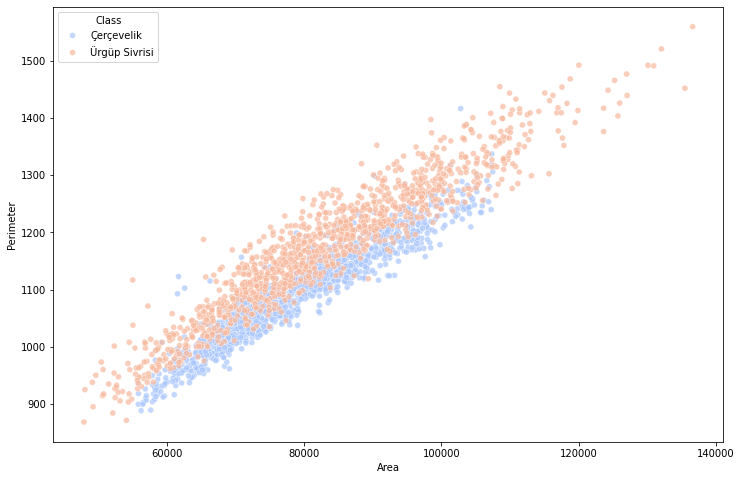

In [5]:

plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="Area", y="Perimeter", hue="Class", alpha=0.7, palette='coolwarm')

df = pd.get_dummies(df,drop_first=True)


# importing necesaary libraries for SVC

In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
df.head()

X = df.drop("Class_Ürgüp Sivrisi", axis=1)
y = df["Class_Ürgüp Sivrisi"]

# Splitting dataset into Trainig and Testing Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

#using SVC model
scaler = StandardScaler()
model = SVC()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = SVC(kernel='linear', random_state=42)  
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# Model Prediction

In [9]:

y_pred = clf.predict(X_test)

# names of all the parameters
model.get_params().keys()

# dictionary that contains the parameters and their values to be used in the hyperparameter search
param_grid = {"C": [0,0.1,1,10,100,1000], "degree":[2,3,4,5], "gamma": ["scale","auto"], "kernel": ['linear', 'poly', 'rbf']}

#hyperparameter tuning
# train the model on each combination of parameters in the param_grid dictionary
grid = GridSearchCV(model,param_grid, cv=5, scoring="accuracy")

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


accuracy_percent=round(accuracy,2)
print("Accuracy is:",accuracy_percent*100,"%")

print(classification_report(y_test, y_pred))



Accuracy: 0.86
Accuracy is: 86.0 %
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       398
           1       0.91      0.79      0.84       352

    accuracy                           0.86       750
   macro avg       0.87      0.86      0.86       750
weighted avg       0.87      0.86      0.86       750



In [10]:
confusion_matrix(y_test, y_pred)

array([[370,  28],
       [ 75, 277]], dtype=int64)